## NN Adv Assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Data

In [2]:
train = pd.read_csv("/content/drive/MyDrive/ToBig's/week6/Train.csv")
test = pd.read_csv("/content/drive/MyDrive/ToBig's/week6/Test.csv")

In [3]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train['label'].nunique()

10

In [5]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [6]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [23]:
len(X)

59500

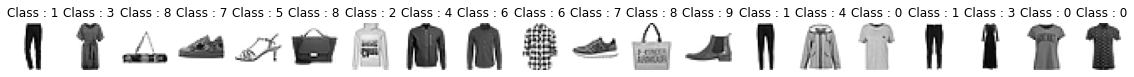

In [7]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [8]:
X_test = test.values

In [24]:
len(X_test)

10500

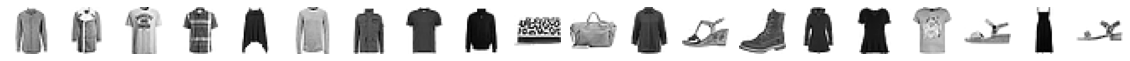

In [9]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

### 기본 NN

In [11]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.5228 - accuracy: 0.8159
Epoch 2/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8568
Epoch 3/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.3571 - accuracy: 0.8680
Epoch 4/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.3310 - accuracy: 0.8774
Epoch 5/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.3113 - accuracy: 0.8835
Epoch 6/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.2980 - accuracy: 0.8896
Epoch 7/10
1488/1488 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8942
Epoch 8/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.8982
Epoch 9/10
1488/1488 [==============================] - 3s 2ms/step - loss: 0.2598 - accuracy: 0.9034
Epoch 10/10
372/372 [==============================] - 1s 2ms/step - loss: 0.3007 

기본적인 NN으로 0.89가량의 정확도가 나오는 것을 확인할 수 있었다. 더 높은 정확도를 위해 convolution을 이용해본다. convolution이란 어레이에 이미지를 통과시키는 방법을 말한다. 이 과정을 거치면 가장자리가 강조된 이미지를 얻을 수 있다. 이를 통해 정확도를 높여본다.

### Conv2D 이용

보통의 conv는 3x3 또는 5x5를 주로 사용한다. 따라서 먼저 3x3의 형태를 사용해보자.

In [25]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

#single tensor를 예상하고 있을 것이므로 reshape시켜줘야한다.
X = X.reshape(59500, 28, 28, 1)
X_test = X_test.reshape(10500, 28, 28, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

먼저 convolution의 수를 64로 설정한다.

In [26]:
#convolution을 더한 모델
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

val data의 정확도가 0.9185로 향상된 것을 확인할 수 있었다. 이번에는 conv의 수를 32로 변경해서 진행해본다.

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_10 (Dense)            (None, 128)              

32개로 바꾸었을 때 val data의 정확도는 유사하고 학습 시간이 빨라지는 것을 볼 수 있었다.

학습시킨 결과를 확인해보자.

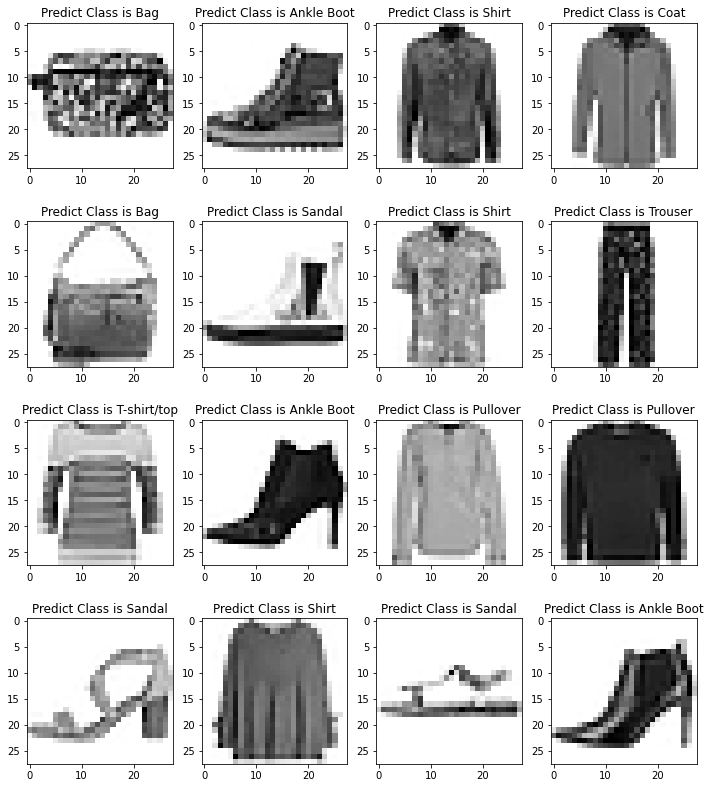

In [31]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

y_pred = model.predict(X_val)
X_val__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_val__[i], cmap='binary')
    ax.set(title = f"Predict Class is {labels[y_pred[i].argmax()]}");

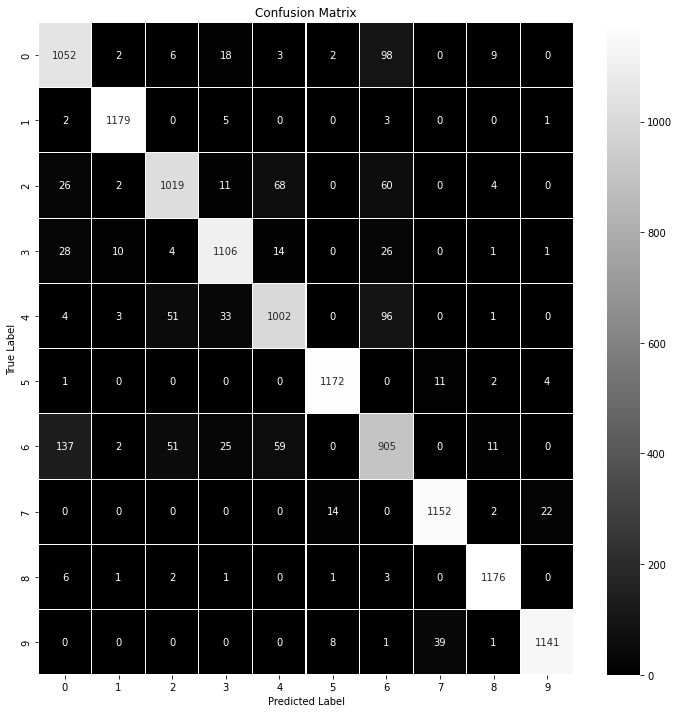

In [33]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = y_val
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

confusion matrix를 통해 0번과 6번을 혼동하는 경우가 많다는 것을 알 수 있었다.

### Dropout 적용하기 / BatchNormalization 적용하기

뉴럴넷의 융통성을 증가시켜 주는 것으로, 일부러 정보를 누락시키거나 중간 중간 노드를 끄는 방식으로 학습시킨다. 이를 통해 일부에 집착하지 않고 중요한 요소를 스스로 학습할 수 있도록 한다. 이 떄의 단점은 학습 시간이 증가하는 것이다. 따라서 conv의 수를 그나마 학습시간이 적고 성능은 비슷한 32로 선택한다.

BatchNormalization을 적용하여 미니배치 단위를 normalization 시켜주어 층마다 데이터의 분포를 일정하게 만들어 준다.

In [36]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [37]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)        

에포크가 좀 더 필요할 것 같으므로 학습을 계속 진행해본다. (앞의 모델들에 비해 loss가 충분히 감소하지 않았고, 꾸준히 감소하는 추세가 보이므로)

In [38]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2897 - accuracy: 0.8913
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2889 - accuracy: 0.8923
Epoch 3/10
1488/1488 [==============================] - 49s 33ms/step - loss: 0.2812 - accuracy: 0.8942
Epoch 4/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2786 - accuracy: 0.8965
Epoch 5/10
1488/1488 [==============================] - 49s 33ms/step - loss: 0.2754 - accuracy: 0.8971
Epoch 6/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2726 - accuracy: 0.8966
Epoch 7/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2698 - accuracy: 0.8992
Epoch 8/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2668 - accuracy: 0.9000
Epoch 9/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2635 - accuracy: 0.9011
Epoch 10/10
372/372 [==============================] - 4s 9ms/st

에포크가 좀 더 필요할 것 같으므로 학습을 계속 진행해본다. (앞의 모델들에 비해 loss가 충분히 감소하지 않았고, 꾸준히 감소하는 추세가 보이므로)

In [39]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 51s 34ms/step - loss: 0.2609 - accuracy: 0.9019
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2572 - accuracy: 0.9033
Epoch 3/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2549 - accuracy: 0.9044
Epoch 4/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2523 - accuracy: 0.9050
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2516 - accuracy: 0.9047
Epoch 6/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2509 - accuracy: 0.9062
Epoch 7/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2451 - accuracy: 0.9071
Epoch 8/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2480 - accuracy: 0.9062
Epoch 9/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2475 - accuracy: 0.9077
Epoch 10/10
372/372 [==============================] - 4s 9ms/st

In [40]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2417 - accuracy: 0.9095
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2435 - accuracy: 0.9093
Epoch 3/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2411 - accuracy: 0.9098
Epoch 4/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2373 - accuracy: 0.9104
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2358 - accuracy: 0.9096
Epoch 6/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2349 - accuracy: 0.9118
Epoch 7/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2335 - accuracy: 0.9116
Epoch 8/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2375 - accuracy: 0.9108
Epoch 9/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2321 - accuracy: 0.9137
Epoch 10/10
372/372 [==============================] - 3s 9ms/st

In [41]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2300 - accuracy: 0.9132
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2311 - accuracy: 0.9130
Epoch 3/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2282 - accuracy: 0.9144
Epoch 4/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2291 - accuracy: 0.9148
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2290 - accuracy: 0.9139
Epoch 6/10
1488/1488 [==============================] - 47s 32ms/step - loss: 0.2228 - accuracy: 0.9173
Epoch 7/10
1488/1488 [==============================] - 45s 31ms/step - loss: 0.2243 - accuracy: 0.9152
Epoch 8/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2264 - accuracy: 0.9166
Epoch 9/10
1488/1488 [==============================] - 47s 31ms/step - loss: 0.2218 - accuracy: 0.9166
Epoch 10/10
372/372 [==============================] - 3s 9ms/st

In [42]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 48s 33ms/step - loss: 0.2247 - accuracy: 0.9150
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2212 - accuracy: 0.9167
Epoch 3/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2216 - accuracy: 0.9164
Epoch 4/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2205 - accuracy: 0.9166
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2181 - accuracy: 0.9188
Epoch 6/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2197 - accuracy: 0.9170
Epoch 7/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2188 - accuracy: 0.9179
Epoch 8/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2203 - accuracy: 0.9167
Epoch 9/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2189 - accuracy: 0.9176
Epoch 10/10
372/372 [==============================] - 3s 9ms/st

In [43]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2172 - accuracy: 0.9188
Epoch 2/10
1488/1488 [==============================] - 47s 31ms/step - loss: 0.2168 - accuracy: 0.9177
Epoch 3/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2160 - accuracy: 0.9184
Epoch 4/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2123 - accuracy: 0.9197
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2126 - accuracy: 0.9200
Epoch 6/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2131 - accuracy: 0.9200
Epoch 7/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2147 - accuracy: 0.9197
Epoch 8/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2106 - accuracy: 0.9192
Epoch 9/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2114 - accuracy: 0.9190
Epoch 10/10
372/372 [==============================] - 3s 9ms/st

In [44]:
model.fit(X_train, y_train, epochs=10)

val_loss = model.evaluate(X_val, y_val)

Epoch 1/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2069 - accuracy: 0.9212
Epoch 2/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2094 - accuracy: 0.9215
Epoch 3/10
1488/1488 [==============================] - 47s 31ms/step - loss: 0.2079 - accuracy: 0.9214
Epoch 4/10
1488/1488 [==============================] - 49s 33ms/step - loss: 0.2102 - accuracy: 0.9200
Epoch 5/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2119 - accuracy: 0.9187
Epoch 6/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2103 - accuracy: 0.9205
Epoch 7/10
1488/1488 [==============================] - 48s 32ms/step - loss: 0.2091 - accuracy: 0.9213
Epoch 8/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2066 - accuracy: 0.9230
Epoch 9/10
1488/1488 [==============================] - 46s 31ms/step - loss: 0.2110 - accuracy: 0.9210
Epoch 10/10
372/372 [==============================] - 4s 9ms/st

총 80번의 에포크를 돌려주었고, 더이상 loss가 감소하지 않으므로 학습을 멈춘다. dropout을 적용해보니 확실히 학습에 더 많은 시간이 소요되는 것을 알 수 있었다. val data의 정확도 역시 증가했다.

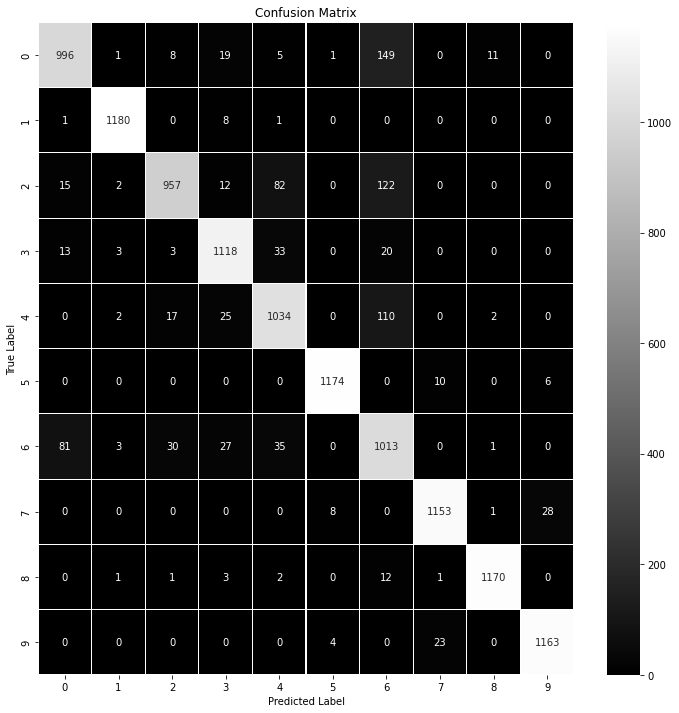

In [45]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis = 1)
y_true = y_val
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="white", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

confusion matrix로 확인해 본 결과 6을 0으로 혼동하는 경우는 많이 적어졌다. 그러나 6이 아닌 이미지들(0,2,4)을 6으로 혼동하는 경우가 매우 증가했음을 볼 수 있다.

대신 그 외의 것들은 예측력이 상승한 것을 볼 수 있다.

최종 테스트 데이터에 적용한 결과를 확인하고 싶었으나 label 데이터가 존재하지 않아 최종 테스트 결과에는 적용해보지 못했다.